In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score
from math import sqrt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline

In [2]:
data=pd.read_csv('C:\ML2023\data\kc_house_data.csv')

# Предварительная обработка и разведочный анализ данных:

In [3]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
data.shape

(21613, 21)

In [9]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Анализ данных:
- Дубликатов и пропущенных значений нет
- Столбцы 'id','zipcode','lat','long','date' не нужны, их нужно дропнуть
- Данные в столбцах "bathrooms" и "floors" преобразовать целочисленный тип данных, так как количество ванных комнат и этажей не может быть нецелым

In [10]:
data.drop(['id','zipcode','lat','long','date','sqft_lot','condition'],inplace=True,axis=1)

In [11]:
data['floors']=data['floors'].astype(int)
data['sqft_living']=data['sqft_living'].astype(float)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  float64
 4   floors         21613 non-null  int32  
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   grade          21613 non-null  int64  
 8   sqft_above     21613 non-null  int64  
 9   sqft_basement  21613 non-null  int64  
 10  yr_built       21613 non-null  int64  
 11  yr_renovated   21613 non-null  int64  
 12  sqft_living15  21613 non-null  int64  
 13  sqft_lot15     21613 non-null  int64  
dtypes: float64(3), int32(1), int64(10)
memory usage: 2.2 MB


In [13]:
data.shape

(21613, 14)

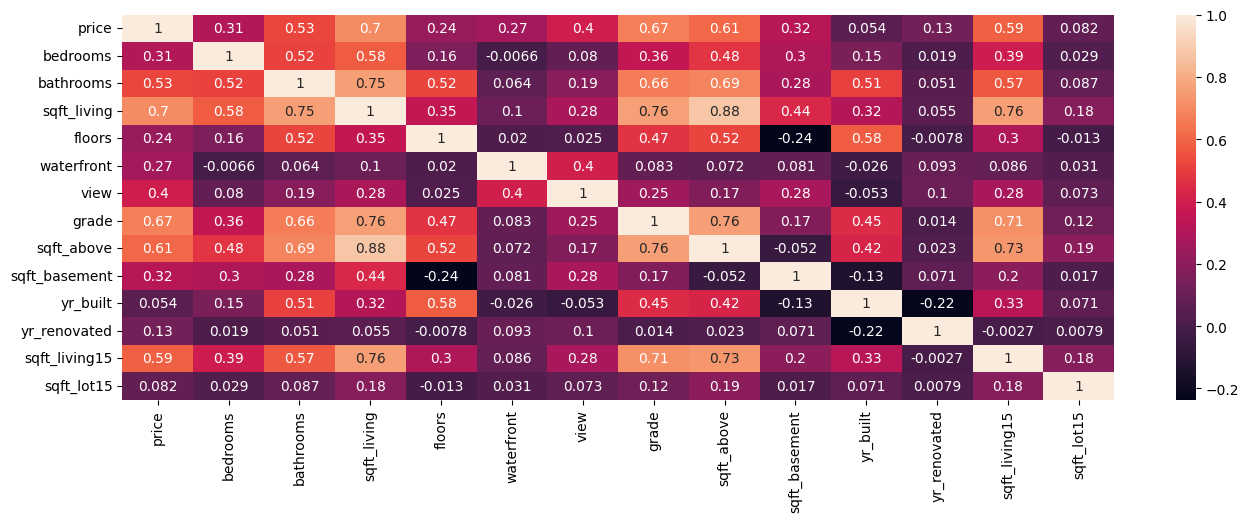

In [14]:
df_num = data.select_dtypes(include=np.number)
df_corr = df_num.corr()
plt.figure(figsize = (16,5))
sns.heatmap(df_corr, annot=True);

# Выбросы:

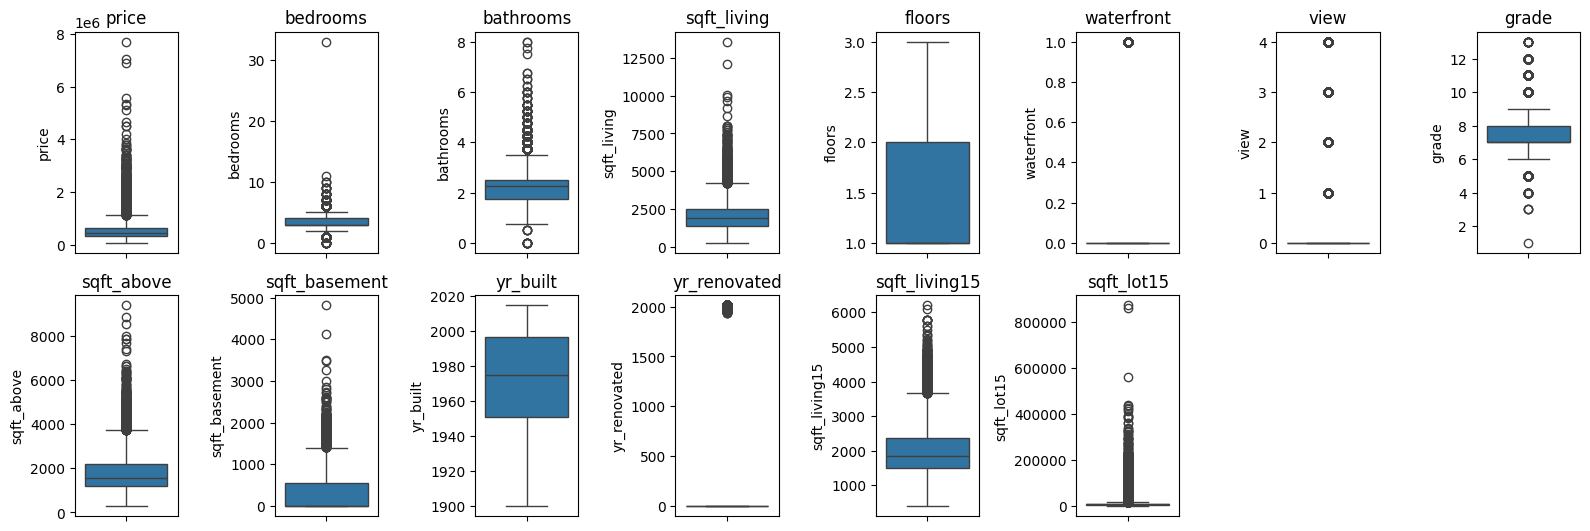

In [15]:
plt.figure(figsize=(16, 8))
for i, column in enumerate(df_num.columns):
    plt.subplot(3, 8, i + 1)
    sns.boxplot(data=df_num, y=column)
    plt.title(column)

plt.tight_layout()
plt.show()

**Вывод:** убрать выбросы в столбцах "price","sqft_living", "sqft_above", "sqft_above"

In [16]:
#outlier = data[['price',
                #'bathrooms',
                #'sqft_living',
                #'sqft_above',
                #'sqft_lot15'
               #]]

In [17]:
#Q1 = outlier.quantile(0.25)
#Q3 = outlier.quantile(0.75)
#IQR = Q3-Q1
#data_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]

In [18]:
#index_list = list(data_filtered.index.values)
#data_filtered = data[data.index.isin(index_list)]

In [19]:
#df_num = data_filtered.select_dtypes(include=np.number)
#df_corr = df_num.corr()

In [20]:
#len(data[data.price>=1500000])

In [21]:
data=data[data.price<=7000000]
data=data[data.bedrooms<=8]
data=data[data.bathrooms<=5]
data=data[data.sqft_living<=6000]
data=data[data.sqft_above<=5500]
data=data[data.sqft_living15<=5000]
data=data[data.sqft_basement<=2000]
data=data[data.sqft_lot15<=225000]
#data=data[data.grade<=10]

In [22]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.139900e+04,21399.000000,21399.000000,21399.000000,21399.000000,21399.000000,21399.000000,21399.000000,21399.000000,21399.000000,21399.00000,21399.000000,21399.000000,21399.000000
mean,5.292545e+05,3.356372,2.097762,2050.169073,1.444367,0.007150,0.224403,7.633628,1767.730221,282.438852,1970.88920,83.657975,1973.619375,11910.754241
std,3.288201e+05,0.888711,0.741831,851.022585,0.551808,0.084256,0.748192,1.142514,786.816317,422.226118,29.36705,399.975368,665.372636,21563.882392
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,0.000000,0.000000,1.000000,290.000000,0.000000,1900.00000,0.000000,460.000000,651.000000
25%,3.200000e+05,3.000000,1.500000,1420.000000,1.000000,0.000000,0.000000,7.000000,1190.000000,0.000000,1951.00000,0.000000,1480.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1900.000000,1.000000,0.000000,0.000000,7.000000,1550.000000,0.000000,1975.00000,0.000000,1830.000000,7600.000000
75%,6.380000e+05,4.000000,2.500000,2530.000000,2.000000,0.000000,0.000000,8.000000,2190.000000,550.000000,1996.00000,0.000000,2350.000000,10006.000000
max,3.800000e+06,8.000000,5.000000,5990.000000,3.000000,1.000000,4.000000,13.000000,5480.000000,2000.000000,2015.00000,2015.000000,5000.000000,224770.000000


In [23]:
df_num = data.select_dtypes(include=np.number)
df_corr = df_num.corr()

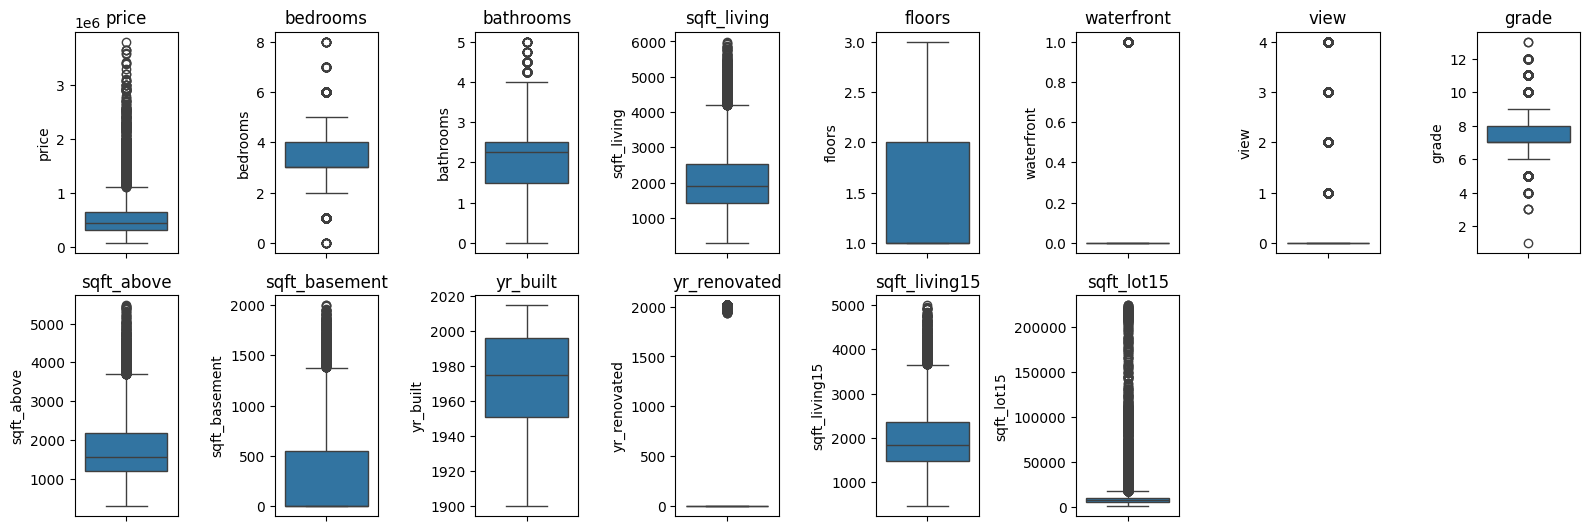

In [24]:
plt.figure(figsize=(16, 8))
for i, column in enumerate(df_num.columns):
    plt.subplot(3, 8, i + 1)
    sns.boxplot(data=df_num, y=column)
    plt.title(column)

plt.tight_layout()
plt.show()

Если удалить выбросы, метрики ухудшаются. Поэтому пришлось вручную

In [25]:
data.to_csv('Lab3.csv')

# Реализация метрик:

In [26]:
def MAE(y_test, y_pred):
  return abs(y_test-y_pred).mean()

In [27]:
def MSE(y_test, y_pred):
  return ((y_test-y_pred)**2).mean()

In [28]:
def RMSE(y_test, y_pred):
  return sqrt(MSE(y_test,y_pred) )

In [29]:
def MAPE(y_test, y_pred):
  return (abs(y_test-y_pred)/abs(y_test)).mean()

In [30]:
def R2(y_test, y_pred):
  return 1-MSE(y_test, y_pred)/((y_test- y_test.mean())**2).mean()

In [31]:
def My_metrics(y_test, y_pred):
    print('My metrics:')
    print(f'MAE: {MAE(y_test, y_pred)}')
    print(f'MSE: {MSE(y_test, y_pred)}')
    print(f'RMSE: {RMSE(y_test, y_pred)}')
    print(f'MAPE: {MAPE(y_test, y_pred)}')
    print(f'R^2: {R2(y_test, y_pred)}')

# Подготовка:

In [32]:
def Metrics(y_test, y_pred):
    print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
    print(f'MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
    print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
    print(f'R^2: {r2_score(y_test, y_pred)}')
    print()
    My_metrics(y_test, y_pred)

In [33]:
def Parameters(X_train,y_train):
    parameters = {'alpha': np.arange(0, 3, 0.1)}
    ridge_param = GridSearchCV(Ridge(), parameters).fit(X_train, y_train).best_params_
    lasso_param = GridSearchCV(Lasso(), parameters).fit(X_train, y_train).best_params_
    return [ridge_param,lasso_param]

In [34]:
def L1(X_train, y_train, X_test, alpha):
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    Metrics(y_test,y_pred)

In [35]:
def L2(X_train, y_train, X_test, alpha):
    lasso = Lasso(alpha=alpha).fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    Metrics(y_test,y_pred)

# Простая линейная регрессия 

In [36]:
y=data['price']
X=data.drop(['price'],axis=1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [38]:
X_train_simple=X_train['sqft_living'].values.reshape(-1,1)
X_test_simple=X_test['sqft_living'].values.reshape(-1,1)

In [39]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
X_train

array([[ 0.72227284, -0.13059173, -0.25814307, ..., -0.20831047,
        -0.0409962 , -0.26702445],
       [-0.39497562,  0.20645031, -0.69168153, ..., -0.20831047,
        -0.42994289, -0.37651751],
       [-1.51222408,  0.54349236, -0.117536  , ..., -0.20831047,
        -0.48978084, -0.47634117],
       ...,
       [ 0.72227284, -0.46763378, -0.27689068, ..., -0.20831047,
        -1.02832241, -0.31934195],
       [-0.39497562, -0.13059173, -0.2229913 , ..., -0.20831047,
        -0.59449726, -0.37436875],
       [-0.39497562, -0.13059173, -0.46905367, ..., -0.20831047,
         0.67705923, -0.27262989]])

In [41]:
scaler=StandardScaler()
scaler.fit(X_train_simple)
X_train_simple = scaler.transform(X_train_simple)
X_test_simple = scaler.transform(X_test_simple)

In [42]:
lr_simple = LinearRegression().fit(X_train_simple, y_train)

In [43]:
y_pred = lr_simple.predict(X_test_simple)

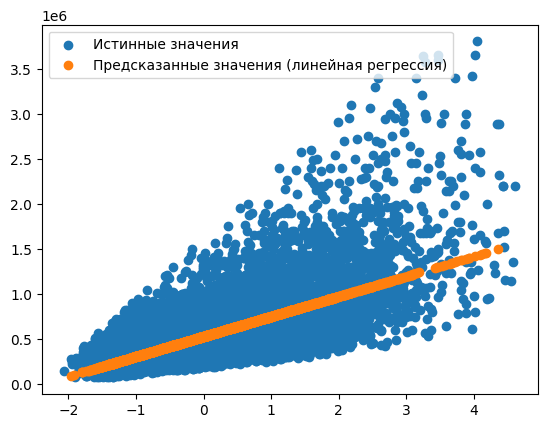

In [44]:
plt.scatter(X_train_simple, y_train, label='Истинные значения');
plt.scatter(X_test_simple, y_pred , label='Предсказанные значения (линейная регрессия)');
plt.legend();

In [45]:
data.shape

(21399, 14)

In [46]:
Metrics(y_test,y_pred)

MAE: 166867.57769391622
MSE: 58373733641.23594
RMSE: 241606.56787686038
MAPE: 0.5938820475551789
R^2: 0.45387697329858057

My metrics:
MAE: 166867.57769391622
MSE: 58373733641.23594
RMSE: 241606.56787686038
MAPE: 0.35269588640833177
R^2: 0.45387697329858057


In [47]:
#Parameters(X_train_simple,y_train)
alpha=4

In [48]:
L1(X_train_simple, y_train, X_test_simple, alpha)

MAE: 166861.80253089813
MSE: 58373886575.6505
RMSE: 241606.88437139057
MAPE: 0.5938792271583315
R^2: 0.4538755425008544

My metrics:
MAE: 166861.80253089813
MSE: 58373886575.6505
RMSE: 241606.88437139057
MAPE: 0.3526925364501771
R^2: 0.4538755425008544


In [49]:
L2(X_train_simple, y_train, X_test_simple, alpha)

MAE: 166867.13168954756
MSE: 58373745251.93589
RMSE: 241606.59190497242
MAPE: 0.5938818293063438
R^2: 0.4538768646731731

My metrics:
MAE: 166867.13168954756
MSE: 58373745251.93589
RMSE: 241606.59190497242
MAPE: 0.35269562718024927
R^2: 0.45387686467317323


# Множественная линейная регрессия c регуляризацией и без

- Множественная регрессия без регуляризации:

In [50]:
lr = LinearRegression().fit(X_train, y_train)

In [51]:
y_pred = lr.predict(X_test)

In [52]:
Metrics(y_test,y_pred)

MAE: 133809.74028416353
MSE: 39297308869.86188
RMSE: 198235.4884218814
MAPE: 0.5308351218863488
R^2: 0.6323489363704318

My metrics:
MAE: 133809.74028416353
MSE: 39297308869.86188
RMSE: 198235.4884218814
MAPE: 0.2817859266280949
R^2: 0.6323489363704318


- С регуляризацией:

In [53]:
#Parameters(X_train,y_train)
#[{'alpha': 3.9000000000000004}, {'alpha': 3.9000000000000004}]

In [54]:
alpha=4
L1(X_train, y_train, X_test, alpha)

MAE: 133786.23311226995
MSE: 39294526902.28692
RMSE: 198228.4714724071
MAPE: 0.5307691797965305
R^2: 0.63237496342845

My metrics:
MAE: 133786.23311226995
MSE: 39294526902.28692
RMSE: 198228.4714724071
MAPE: 0.2817159222218817
R^2: 0.63237496342845


In [55]:
#R^2: 0.5584079878511853
alpha=4
L2(X_train, y_train, X_test, alpha)

MAE: 133789.2693270008
MSE: 39294298322.14544
RMSE: 198227.8949142765
MAPE: 0.5307796121300279
R^2: 0.6323771019395734

My metrics:
MAE: 133789.2693270008
MSE: 39294298322.14544
RMSE: 198227.8949142765
MAPE: 0.2817269966529029
R^2: 0.6323771019395734


C:\ML2023\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.809e+13, tolerance: 1.856e+11
  model = cd_fast.enet_coordinate_descent(


# Полиномиальная регрессия (pipeline):

In [56]:
Input = [('standardscaler', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2, include_bias=False)), ('model', LinearRegression()) ]

In [57]:
pipeline = Pipeline(Input)

In [58]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [59]:
y_pred = pipeline.predict(X_test)

C:\Users\vlszg\AppData\Local\Temp\ipykernel_16240\42023590.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(y_test, hist=False, color='Red', label='Истинные значения')
C:\Users\vlszg\AppData\Local\Temp\ipykernel_16240\42023590.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

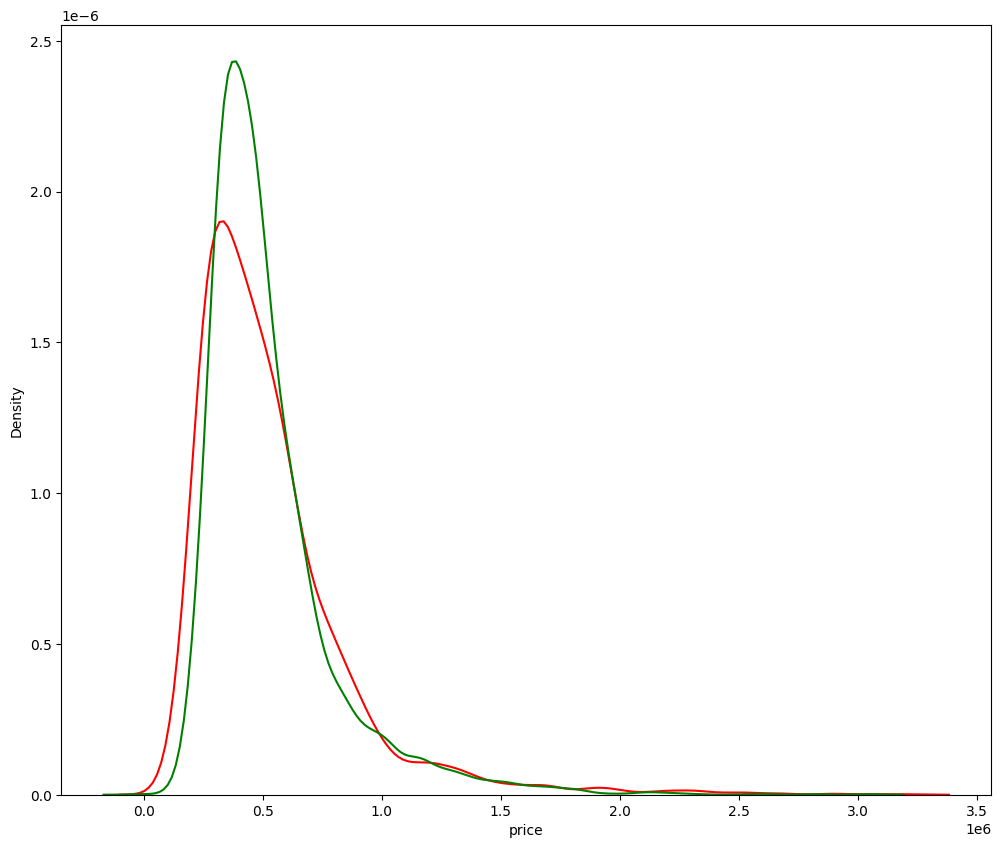

In [60]:
plt.figure(figsize=(12,10))
ax2 = sns.distplot(y_test, hist=False, color='Red', label='Истинные значения')
sns.distplot(y_pred, hist=False, color='Green', label='Предсказанные значения')
plt.show()

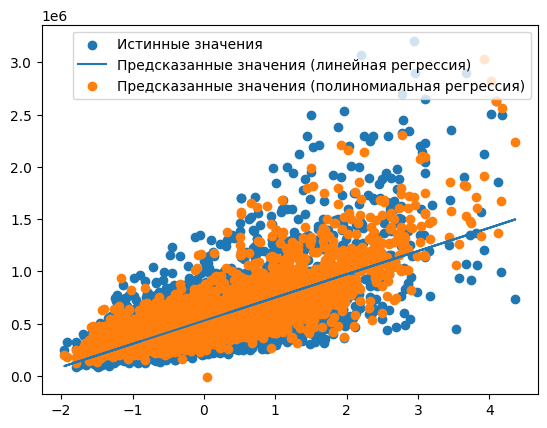

In [61]:
plt.scatter(X_test_simple, y_test, label='Истинные значения');
plt.plot(X_test_simple, lr_simple.predict(X_test_simple), label='Предсказанные значения (линейная регрессия)');
plt.scatter(X_test_simple, y_pred, label='Предсказанные значения (полиномиальная регрессия)');
plt.legend();

In [62]:
print('Для полиномиальной регрессии без регуляризации R^2 =', pipeline.score(X_train, y_train))
Metrics(y_test,y_pred) #751682

Для полиномиальной регрессии без регуляризации R^2 = 0.7198051412625617
MAE: 123392.54462616822
MSE: 33053774891.922665
RMSE: 181806.97151628335
MAPE: 0.511342773427363
R^2: 0.690761127276388

My metrics:
MAE: 123392.54462616822
MSE: 33053774891.922665
RMSE: 181806.97151628335
MAPE: 0.26147143193638744
R^2: 0.690761127276388


# С регуляризацией

In [63]:
pipeline = make_pipeline(StandardScaler(),PolynomialFeatures(2), Ridge()) 

In [64]:
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)

In [65]:
Metrics(y_test,y_pred)

MAE: 123273.78127146249
MSE: 33081459294.24523
RMSE: 181883.09238146694
MAPE: 0.5103120367195053
R^2: 0.6905021222642751

My metrics:
MAE: 123273.78127146249
MSE: 33081459294.24523
RMSE: 181883.09238146694
MAPE: 0.2604183748208097
R^2: 0.6905021222642751


In [66]:
pipeline = make_pipeline(StandardScaler(),PolynomialFeatures(2), Lasso()) 

In [67]:
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)

C:\ML2023\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.467e+14, tolerance: 1.856e+11
  model = cd_fast.enet_coordinate_descent(


In [68]:
Metrics(y_test,y_pred)

MAE: 123255.37824452826
MSE: 33090980384.934784
RMSE: 181909.264153684
MAPE: 0.5102123745731874
R^2: 0.6904130464669853

My metrics:
MAE: 123255.37824452826
MSE: 33090980384.934784
RMSE: 181909.264153684
MAPE: 0.2603166671676105
R^2: 0.6904130464669853


# ElasticNet

In [69]:
base_elastic_model = ElasticNet(max_iter=100000)

In [70]:
param_grid = {'alpha': [0.1], 'l1_ratio': [0.99]}

In [71]:
grid_model = GridSearchCV(base_elastic_model,
                          param_grid=param_grid,
                         scoring = 'neg_mean_squared_error',
                         cv = 5, verbose = 2)

In [72]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=  17.1s
[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=  19.2s
[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=  19.9s
[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=  20.2s
[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=  18.9s


GridSearchCV(cv=5, estimator=ElasticNet(max_iter=100000),
             param_grid={'alpha': [0.1], 'l1_ratio': [0.99]},
             scoring='neg_mean_squared_error', verbose=2)

In [73]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 0.99}

In [74]:
y_pred = grid_model.predict(X_test)

In [75]:
Metrics(y_test,y_pred)

MAE: 133774.72846720435
MSE: 39294607634.56408
RMSE: 198228.67510671628
MAPE: 0.5307313507095871
R^2: 0.632374208127173

My metrics:
MAE: 133774.72846720435
MSE: 39294607634.56408
RMSE: 198228.67510671628
MAPE: 0.2816757666260227
R^2: 0.632374208127173


# Вывод

Лучше всего себя показала модель полиномиальной регрессии с регуляризацией Lasso:

- MAE: 109852.55938528715
- MSE: 21239929573.013123
- RMSE: 145739.2519982627
- MAPE: 0.5105262916911486
- R^2: 0.6519593085885093